# Assignment Transient Groundwater Flow


A groundwater extraction station with three wells is to be realized in a very long, 5 km wide, almost straight valley. The valley is bounded by bedrock while the sediments below the water table can be considered a 50 m thick, layer of sand on top of pratically impervious material. As shown in the cross section of  Figure 1, a river, that may be considered fully penetrating and in direct contact with the aquifer, flows along one of the valley walls. The water table is 5 m below ground surface at the center line of the valley, where the wells are to be installed. As is shown on the map in Figure 2, the three wells will be placed 500 m apart along the center line of the valley. Each well will pump 2400 m3/d.

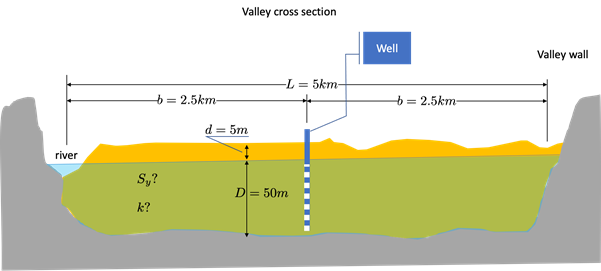

Figure 1 Cross section through the valley

One pumping well and three observation wells were installed first, and a pumping test was done on it to determine the aquifer properties, i.e. its transmissivity kD and its storage coefficient, i.e. its specific yield Sy. The pumping lasted for 1 montsh (30 days) at a rate of 600 m3/d. During this time, the heads in the well and in the piezometers were monitored from which the drawdown relative to the initial situation was determined. These darwdowns are  provided in a table in a accompanying spreadsheet. The header of the table shows at which distance from this well the observation wells were placed. These observation wells (also called piezometers) are not shown on the cross section and the map because they are too close to the well to be shown on this scale.

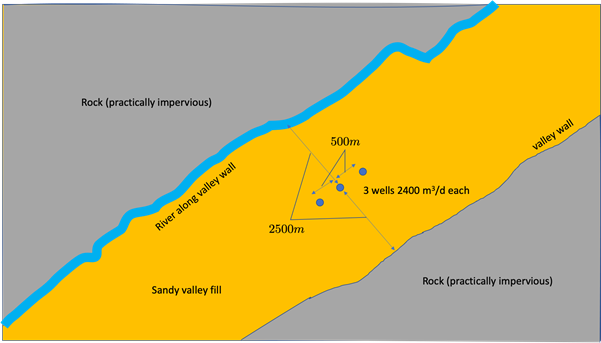

Figure 2: Map of the valley with the final three well in place. The observation wells used in the pumping test are not shown as they are too close to the well for the scale of this map.

Each student obtains a spreadsheet with unique the pumping-test data. You find the spreadsheet with your name in the folder on BBB named “Assignment”. 

# Assignment questions

1)	With the drawdown data given in the accompanying spreadsheet, determine the aquifer properties kD and Sy.

2)	How far out into the aquifer does the drawdown during the pumping test reach?

3)	Is there during the pumping test an influence from the river and or the valley wall on the drawdowns?

4)	What will be the development of the drawdown in the final 3 wells assuming they are fully penetrating and are not clogged?

5)	Show the development of the drawdown along a line perpendicular to the valley axis through the center well.

6)	Show the development of the drawdown along the valley axes through the 3 wells. 

7)	Show the development of the inflow from the river into the aquifer due to the three wells.

8)	Show the drawdown in a map after it has become steady srate.

9)	What is the required depth of the pumps, given that the wells have an extra drawdown due to partial penetration and clogging which doubles the drawdown relative to the case of unclogged fully penetrating well and given that the top of the pump has to be at least 1.5 m below the water table in the well.

Tip: Set the computation up for a single arbitrary point first not worrying about superposition the results for many points (like along a line or in a map) and not worrying about superposition across the river and the valley wall. This can all be included step by step.


# Import the modules that we will need:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import exp1 as W

def set_fig_size(w = 12 , h =8):
    fig = plt.gcf()
    fig.set_size_inches(w, h)

# Get and show our data (pumping test data)

In [3]:
file = 'Alqrinawi_Fuad Younis Mahmoud_1082894.xlsx'
pdata = pd.read_excel(file,index_col='days')
pdata

,r=0 m,r=10 m,r=27 m,r=35 m
days,,,,
0.001000,0.180230,0.000568,0.000858,0.000622
0.001110,0.183542,0.000730,0.000865,0.000612
0.001232,0.186854,0.000948,0.000873,0.000602
0.001367,0.190167,0.001233,0.000882,0.000590
0.001517,0.193482,0.001596,0.000892,0.000577
...,...,...,...,...
19.780054,0.497167,0.253159,0.193438,0.177995
21.950828,0.500454,0.256952,0.198686,0.177154
24.359836,0.509163,0.270676,0.198628,0.188716


In [4]:
r_pz = [0.25, 11, 22, 38]
times = np.asarray(pdata.index)

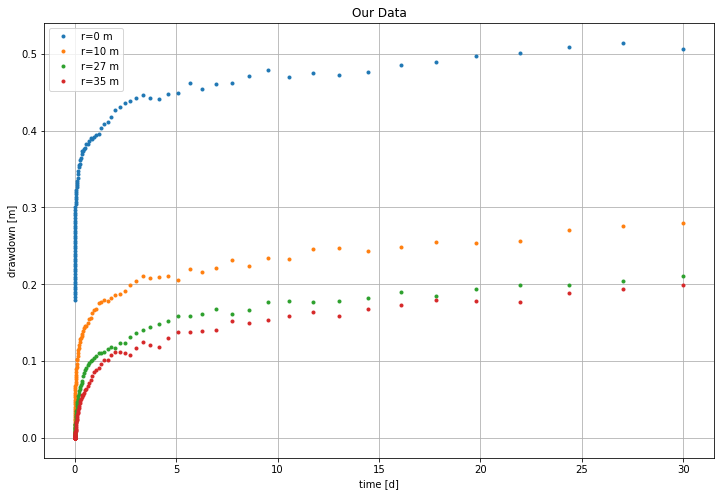

In [5]:
plt.title("Our Data")
plt.xlabel("time [d]")
plt.ylabel("drawdown [m]")
plt.grid(True)

set_fig_size()
for col in pdata.columns:
    plt.plot(times,pdata[col],'.' ,label = col)
    
plt.legend()

## Plotting the drawdown versus days (Double log Scale)

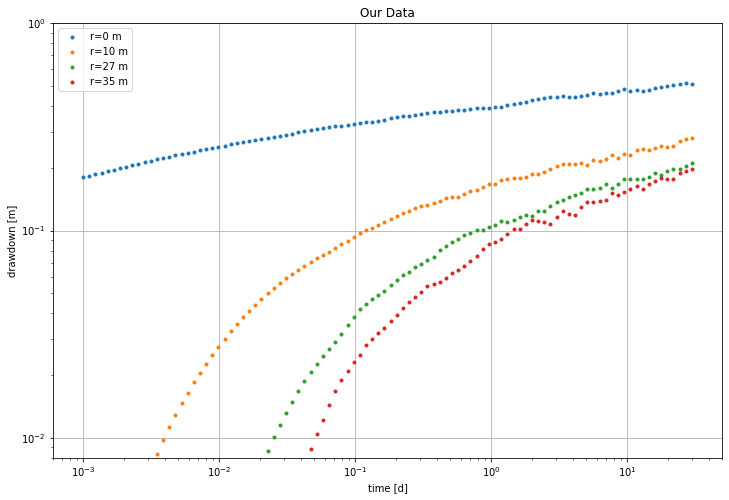

In [9]:
plt.title("Our Data")
plt.xlabel("time [d]")
plt.ylabel("drawdown [m]")
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
set_fig_size()

plt.ylim(8e-3, 1)

for col in pdata.columns:
    plt.plot(times,pdata[col],'.' ,label = col)
    
plt.legend()

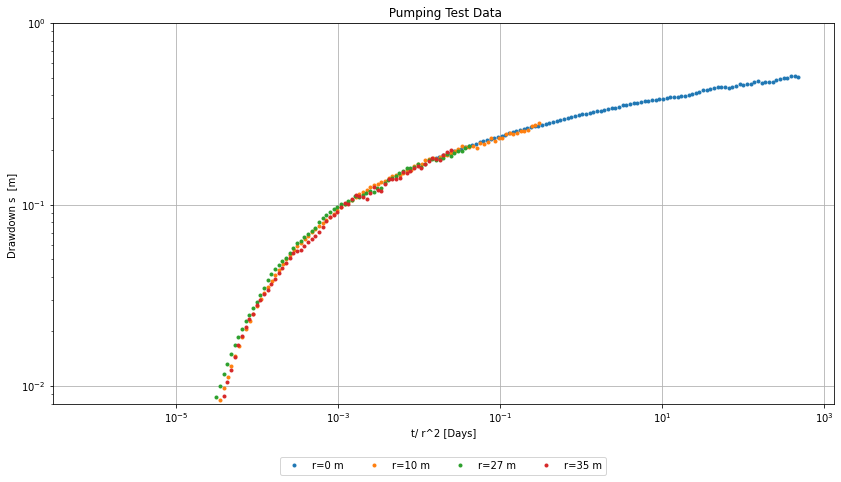

In [12]:
r_pz = [0.25 , 10 , 27 , 35]
t = pdata.index 
#Plotting
for r,col in zip(r_pz ,pdata.columns):  #154
    plt.plot(t/ r **2 , pdata[col] , "." , label =col)  
                                                    
#Styling

plt.title (" Pumping Test Data")
plt.xlabel ( "t/ r^2 [Days]")
plt.ylabel("Drawdown s  [m] ")
plt.grid()

#Scale
plt.xscale('log')
plt.yscale('log')
plt.ylim(8e-3 , 1)
fig = plt.gcf()
fig.set_size_inches(10 , 7)

set_fig_size (w=14 , h=7)

#Legends
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol= 4);

## Plot on double log versus $ \frac{t}{r^2}$ instead of versus $t$

## Our Data on versus $\log(t)\$

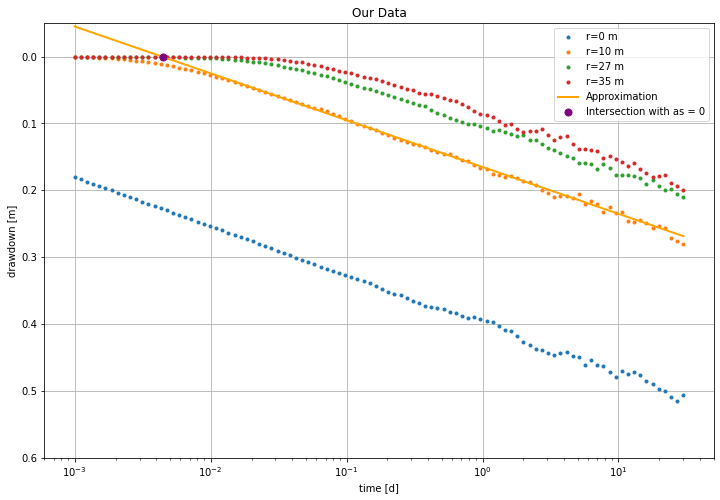

In [15]:
plt.title("Our Data")
plt.xlabel("time [d]")
plt.ylabel("drawdown [m]")
plt.grid(True)
plt.xscale('log')
plt.yscale('linear')
set_fig_size()

plt.ylim(0.6, -0.05)

y0 = 0.165
a = 0.07 # drawdown per log cycle
y = y0 + a * np.log10(times)
s0 = 0
ts = 4.5e-3

for col in pdata.columns:
    plt.plot(times,pdata[col],'.' ,label = col)

plt.plot(times, y, lw=2, color = 'orange' , label = 'Approximation')    
plt.plot(ts, s0,'o', color = 'purple',ms = 7 , label = 'Intersection with as = 0')
plt.legend()

# Determination of the aquifer properties kD and Sy

$$s_{10t} - s_t = \frac{Q}{4 \pi KD} \log(10)$$

$$ KD = \frac{Q}{4 \pi \left(s_{10t} - s_t\right)} \ log(10) $$

$$ KD \approx 2.3 \frac{Q}{4 \pi \left(s_{10t} - s_t\right)}  $$

$$ s\approx \frac{Q}{4 \pi KD} \ln\left(\frac{2.25 KD t} {r^2 S}\right) $$ 

$$ \frac{2.25 KD t}{r^2 S} = 1 $$

$$ s = \frac{2.25 KD t_{s=0}}{r^2} $$

In [16]:
Q = 600 #m3/day
KD = 2.3 * Q /(4*np.pi*a)
S = 2.25 * KD * ts / 11 **2
print ('KD =', KD ,'S =', S)
print ('KD = {:.0f}m2/d \ S = {:.2}[-]'.format(KD,S)) 

KD = 1568.8130104772538 S = 0.13127464240563796
KD = 1569m2/d \ S = 0.13[-]


# Define the three wells and compute the dd at one point as a function of time

In [17]:
Wells = { 1 : {'x':0 , 'y' : -500 , 'Q' : 2400},
          2 : {'x':0 , 'y' : 0    , 'Q' : 2400},
          3 : {'x':0 , 'y' : +500 , 'Q' : 2400}}

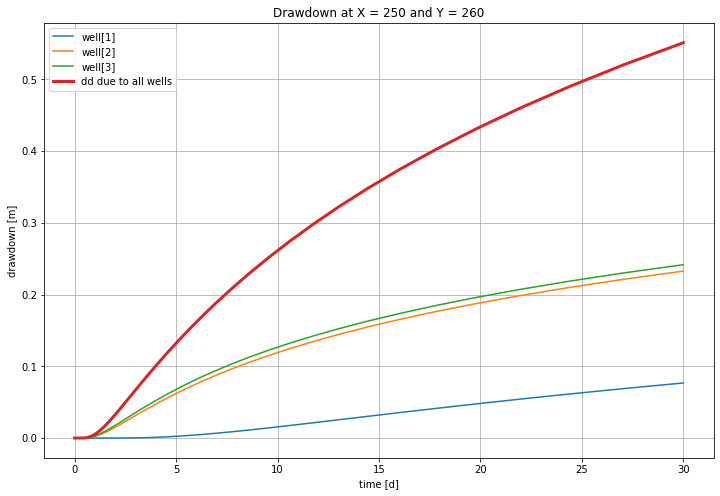

In [18]:
X = 250
Y = 260

times = np.asarray(pdata.index)

plt.title("Drawdown at X = {:.0f} and Y = {:.0f}".format(X,Y))
plt.xlabel("time [d]")
plt.ylabel("drawdown [m]")
plt.grid()

set_fig_size()

s_total = np.zeros_like(times)

for key in Wells:
    well = Wells[key]
    r = np.sqrt ((( X - well['x']))**2 + (( Y - well['y'])**2))
    u = r ** 2 * S / (4 * KD * times)
    s = well['Q'] / (4 * np.pi * KD) * W(u)
    plt.plot(times, s, label ='well[{}]'.format(key))
    
    #s_total = s_total + s
    s_total += s
    
    
plt.plot(times, s_total, lw =3, label ='dd due to all wells')
plt.legend()
    
    

## Drawdown at many points for several times

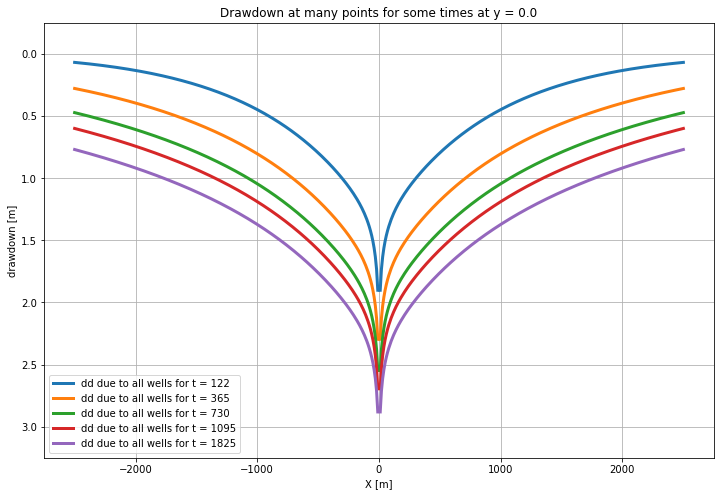

In [19]:
TIME = np.array ([1/3, 1, 2, 3, 5]) * 365

y = 0
X = np.linspace(-2500, 2500, 501)
Y = np.zeros_like(X) + y


plt.title("Drawdown at many points for some times at y = {:.1f}".format(y))
plt.xlabel("X [m]")
plt.ylabel("drawdown [m]")
plt.grid()
plt.ylim(3.25,-0.25)

set_fig_size()


for t in TIME:
    s_total = np.zeros_like(X)
    for key in Wells:
        well = Wells[key]
        r = np.sqrt ((( X - well['x']))**2 + (( Y - well['y'])**2))
        u = r ** 2 * S / (4 * KD * t)
        s = well['Q'] / (4 * np.pi * KD) * W(u)
        #plt.plot(X, s, label ='well[{}]'.format(key))

        #s_total = s_total + s
        s_total += s
    
    
    plt.plot(X, s_total, lw =3, label ='dd due to all wells for t = {:.0f}'.format(t))
plt.legend()

# Continue with just on well, because the details of the three individual wells don't matter at larger distances (valley is 5 km wide, and the distance between the wells was only 500 m)

# To compute the drawdown we need to mirror the well in the center of the valley with respect to be the river on the left and the closed side at the right

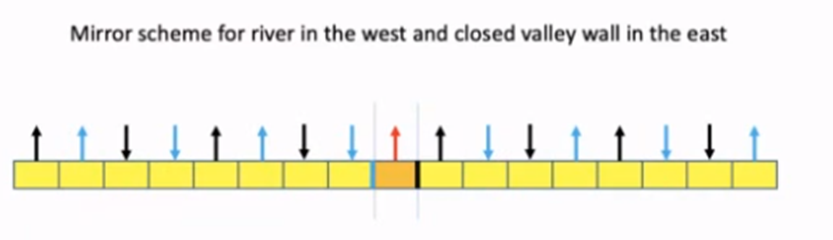

## 3. Yes there is an influence from the river and or the valley wall on the drawdowns as shown in the figure below

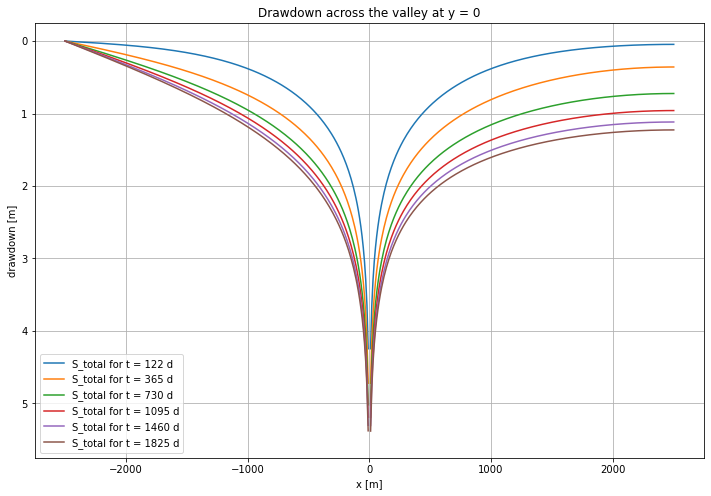

In [20]:
plt.title("Drawdown across the valley at y = 0".format(y))
plt.xlabel("x [m]")
plt.ylabel("drawdown [m]")
plt.grid()
plt.ylim (5.75, -0.25)
set_fig_size()

Q = 2400 * 3 # sum of the three wells that we installed
KD = 1323
S = 0.2
L = 5000 #m
y = 0
X = np.linspace(- L / 2 , L / 2 , 501 )
Y = np.zeros_like(X) + y
times = np.array ([1/3, 1, 2, 3, 4, 5])  * 365
for t in times:
    r=np.sqrt (X ** 2 + Y ** 2 )
    u = r ** 2 * S /(4 * KD * t )
    S_total = Q / ( 4* np.pi * KD) * W(u)
    for n in range (1, 20):
        # Blue wells left
        xn = (2 * n - 1) * L + X
        r=np.sqrt (xn ** 2 + Y ** 2 )
        u = r ** 2 * S /(4 * KD * t )
        Qn = (-1) ** n * Q
        s = Qn / ( 4* np.pi * KD) * W(u)
        S_total += s

        # Black wells left
        xn = 2 * n  * L + X
        r=np.sqrt (xn ** 2 + Y ** 2 )
        u = r ** 2 * S /(4 * KD * t )
        Qn = (-1) ** n * Q
        s = Qn / ( 4* np.pi * KD) * W(u)
        S_total += s

        # Blue wells east
        xn = (2 * n - 1) * L - X
        r=np.sqrt (xn ** 2 + Y ** 2 )
        u = r ** 2 * S /(4 * KD * t )
        Qn = (-1) ** (n-1) * Q
        s = Qn / ( 4* np.pi * KD) * W(u)
        S_total += s

        # Black wells east
        xn = 2 * n  * L - X
        r=np.sqrt (xn ** 2 + Y ** 2 )
        u = r ** 2 * S /(4 * KD * t )
        Qn = (-1) ** n * Q
        s = Qn / ( 4* np.pi * KD) * W(u)
        S_total += s
    #print (S_total)
    plt.plot(X, S_total, label = "S_total for t = {:.0f} d" .format(t))
plt.legend()

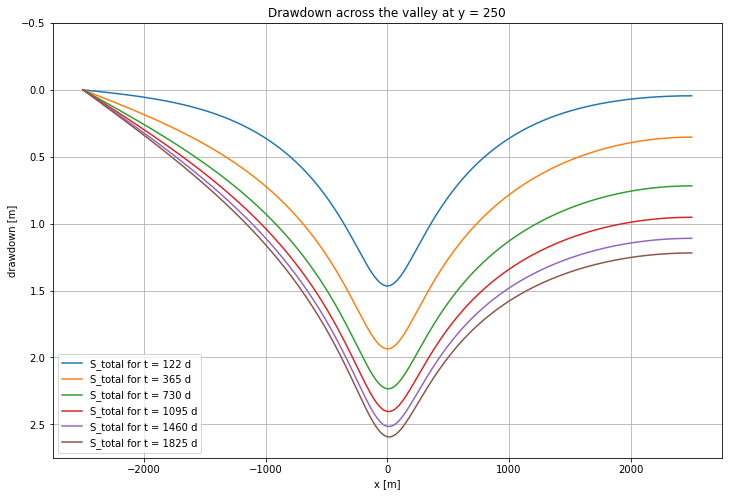

In [13]:
plt.title("Drawdown across the valley at y = 250".format(y))
plt.xlabel("x [m]")
plt.ylabel("drawdown [m]")
plt.grid()
plt.ylim (2.75, -0.5)
set_fig_size()

Q = 2400 * 3 # sum of the three wells that we installed
KD = 1323
S = 0.2
L = 5000 #m
y = 250
X = np.linspace(- L / 2 , L / 2 , 501 )
Y = np.zeros_like(X) + y
times = np.array ([1/3, 1, 2, 3, 4, 5])  * 365
for t in times:
    r=np.sqrt (X ** 2 + Y ** 2 )
    u = r ** 2 * S /(4 * KD * t )
    S_total = Q / ( 4* np.pi * KD) * W(u)
    for n in range (1, 20):
        # Blue wells left
        xn = (2 * n - 1) * L + X
        r=np.sqrt (xn ** 2 + Y ** 2 )
        u = r ** 2 * S /(4 * KD * t )
        Qn = (-1) ** n * Q
        s = Qn / ( 4* np.pi * KD) * W(u)
        S_total += s

        # Black wells left
        xn = 2 * n  * L + X
        r=np.sqrt (xn ** 2 + Y ** 2 )
        u = r ** 2 * S /(4 * KD * t )
        Qn = (-1) ** n * Q
        s = Qn / ( 4* np.pi * KD) * W(u)
        S_total += s

        # Blue wells east
        xn = (2 * n - 1) * L - X
        r=np.sqrt (xn ** 2 + Y ** 2 )
        u = r ** 2 * S /(4 * KD * t )
        Qn = (-1) ** (n-1) * Q
        s = Qn / ( 4* np.pi * KD) * W(u)
        S_total += s

        # Black wells east
        xn = 2 * n  * L - X
        r=np.sqrt (xn ** 2 + Y ** 2 )
        u = r ** 2 * S /(4 * KD * t )
        Qn = (-1) ** n * Q
        s = Qn / ( 4* np.pi * KD) * W(u)
        S_total += s
    #print (S_total)
    plt.plot(X, S_total, label = "S_total for t = {:.0f} d" .format(t))
plt.legend()

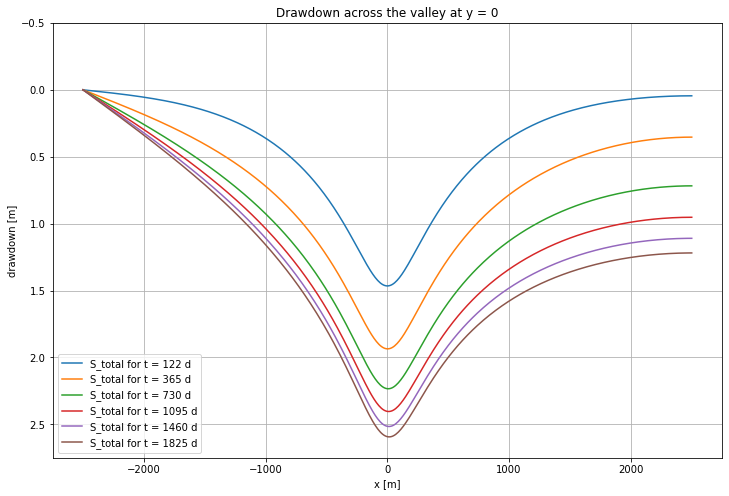

In [21]:
plt.title("Drawdown across the valley at y = {}".format(y))
plt.xlabel("x [m]")
plt.ylabel("drawdown [m]")
plt.grid()
plt.ylim (2.75, -0.5)
set_fig_size()

Q = 2400 * 3 # sum of the three wells that we installed
KD = 1323
S = 0.2
L = 5000 #m
y = -250
X = np.linspace(- L / 2 , L / 2 , 501 )
Y = np.zeros_like(X) + y
times = np.array ([1/3, 1, 2, 3, 4, 5])  * 365
for t in times:
    r=np.sqrt (X ** 2 + Y ** 2 )
    u = r ** 2 * S /(4 * KD * t )
    S_total = Q / ( 4* np.pi * KD) * W(u)
    for n in range (1, 20):
        # Blue wells left
        xn = (2 * n - 1) * L + X
        r=np.sqrt (xn ** 2 + Y ** 2 )
        u = r ** 2 * S /(4 * KD * t )
        Qn = (-1) ** n * Q
        s = Qn / ( 4* np.pi * KD) * W(u)
        S_total += s

        # Black wells left
        xn = 2 * n  * L + X
        r=np.sqrt (xn ** 2 + Y ** 2 )
        u = r ** 2 * S /(4 * KD * t )
        Qn = (-1) ** n * Q
        s = Qn / ( 4* np.pi * KD) * W(u)
        S_total += s

        # Blue wells east
        xn = (2 * n - 1) * L - X
        r=np.sqrt (xn ** 2 + Y ** 2 )
        u = r ** 2 * S /(4 * KD * t )
        Qn = (-1) ** (n-1) * Q
        s = Qn / ( 4* np.pi * KD) * W(u)
        S_total += s

        # Black wells east
        xn = 2 * n  * L - X
        r=np.sqrt (xn ** 2 + Y ** 2 )
        u = r ** 2 * S /(4 * KD * t )
        Qn = (-1) ** n * Q
        s = Qn / ( 4* np.pi * KD) * W(u)
        S_total += s
    #print (S_total)
    plt.plot(X, S_total, label = "S_total for t = {:.0f} d" .format(t))
plt.legend()

# 4.Drawdown along the valley axes through the 3 wells

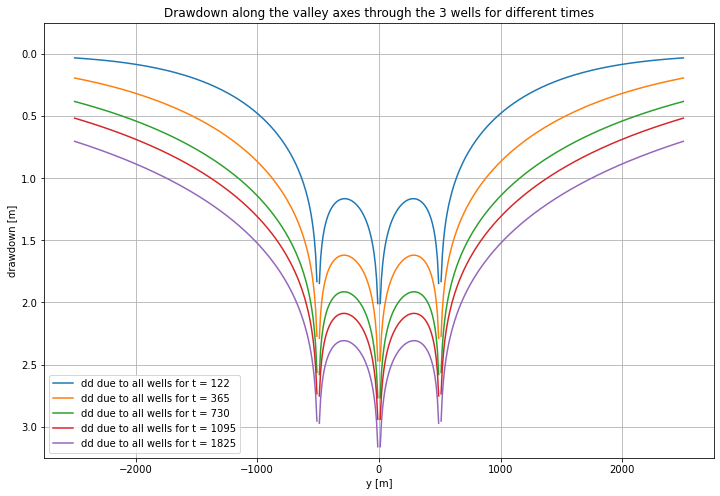

In [22]:
IME = np.array ([1/3, 1, 2, 3, 5]) * 365

x = 0
Y = np.linspace(-2500, 2500, 501)
X = np.zeros_like(Y) + x



plt.title("Drawdown along the valley axes through the 3 wells for different times")
plt.xlabel("y [m]")
plt.ylabel("drawdown [m]")
plt.grid()
plt.ylim(3.25,-0.25)

set_fig_size()


for t in TIME:
    s_total = np.zeros_like(X)
    for key in Wells:
        well = Wells[key]
        r = np.sqrt ((( X - well['x']))**2 + (( Y - well['y'])**2))
        u = r ** 2 * S / (4 * KD * t)
        s = well['Q'] / (4 * np.pi * KD) * W(u)
        #plt.plot(X, s, label ='well[{}]'.format(key))

        #s_total = s_total + s
        s_total += s
    
    
    plt.plot(Y, s_total,  label ='dd due to all wells for t = {:.0f}'.format(t))
plt.legend()

# What is the influx from the river into the aquifer?

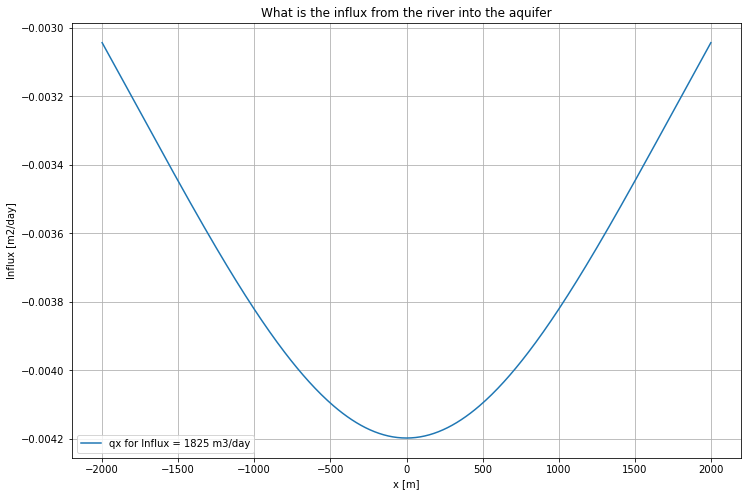

In [23]:
plt.title("What is the influx from the river into the aquifer")
plt.xlabel("x [m]")
plt.ylabel("Influx [m2/day]")
plt.grid()
#plt.ylim (0.001, -0.005)
set_fig_size()

Q = 2400 * 3 # sum of the three wells that we installed
KD = 1323
S = 0.2
L = 5000 #m
Y = np.linspace(-2000 , 2000 , 401 )
X = np.zeros_like(Y) - L/2
r = np.sqrt (X ** 2 + Y ** 2 )
xm = - L/2
#times = np.array ([1/3, 1, 2, 3, 4, 5])  * 365
for R in r:
    r=np.sqrt (X ** 2 + Y ** 2 )
    qr = Q / ( 4* np.pi * r ) * np.e ** -4
    # Blue wells left
    Xm = X - xm
    r = np.sqrt (Xm ** 2 + Y ** 2 )
    qx = qr * Xm / R
       
       

    # Blue wells east
    Xm = X + xm
    r = np.sqrt (Xm ** 2 + Y ** 2 )
    qx = qr * Xm / r

    
    #print (S_total)
plt.plot(Y, qx, label = "qx for Influx = {:.0f} m3/day" .format(t))
plt.legend()

## Specific Dischargae
$$q = \frac{Q} {2 \pi r}$$

$$q_x = \frac{Q} {2 \pi r} \ cos \theta$$
$$q_y = \frac{Q} {2 \pi r} \ sin \theta$$

$$q_x = \frac{Q} {2 \pi r} \left(\frac{x_w - x}{r}\right)$$    
$$q_y = \frac{Q} {2 \pi r} \left(\frac{y_w - y}{r}\right)$$

$$q_x = \frac{Q} {2 \pi r^2} (x_w - x)$$
$$q_y = \frac{Q} {2 \pi r^2} (y_w - y)$$

Tranisent Case

$$q_{x, t} = \frac{Q e^{-u}} {2 \pi r^2} (x_w - x)$$
$$q_{y, t} = \frac{Q e^{-u}} {2 \pi r^2} (y_w - y)$$


qx= 0.513686299082807 ,qy= -0.4346576376854522


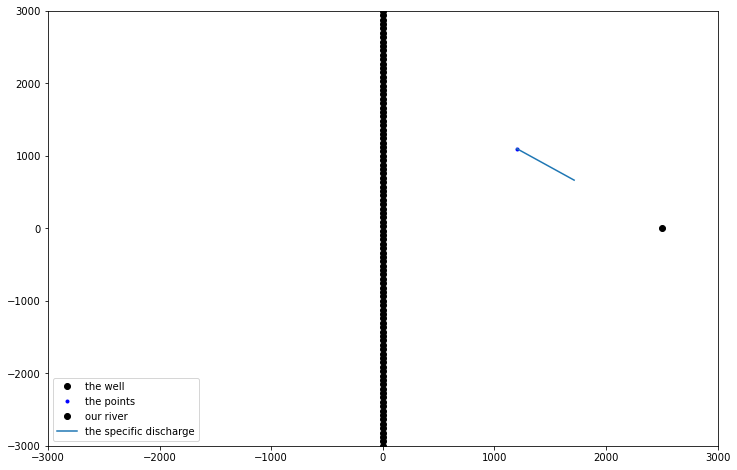

In [24]:
# Combine the three wells into one big well
Q  = 3 * 2400
Yriv = np.linspace(-3000, 3000, 100)
Xriv = np.zeros_like(Yriv)
Xw, Yw = 2500, 0
X =1200
Y =1100
r = np.sqrt ((Xw-X) **2 +(Yw-Y)**2)
qx = Q /(2*np.pi*r**2)*(Xw-X)
qy = Q /(2*np.pi*r**2)*(Yw-Y)
print ('qx=' , qx, ',qy=' , qy)
sc =1000
plt.plot( Xw, Yw, 'ok' , label = 'the well')
plt.plot( X, Y, 'b.' , label = 'the points')
plt.plot( Xriv, Yriv, 'ok' , label = 'our river')
plt.plot([X, X+sc*qx], [Y, Y+sc*qy], label = 'the specific discharge')
plt.xlim(-3000, +3000)
plt.ylim(-3000, +3000)
plt.legend(loc = 'lower left')
set_fig_size()


## Now for two or more wells

qx= 0.7333859777674538 ,qy= -0.3666929888837269


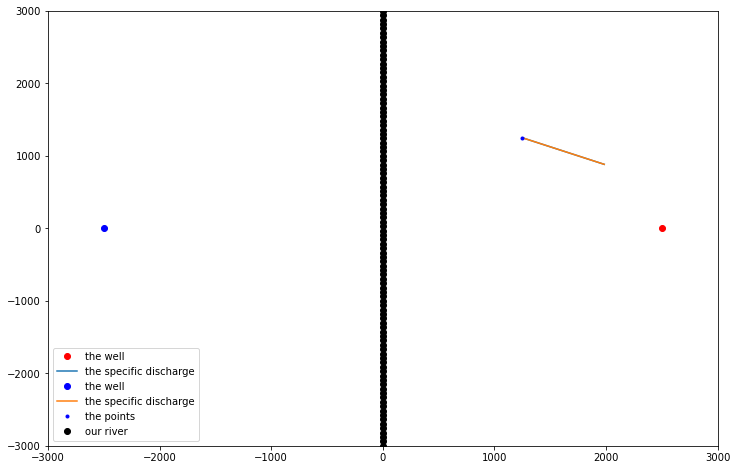

In [25]:
# Combine the three wells into one big well
Q  = 3 * 2400
Yriv = np.linspace(-3000, 3000, 100)
Xriv = np.zeros_like(Yriv)
# Here we define two wells
Qw = [Q, -Q]
Xw = [2500, -2500]
Yw = [0, 0]
labels = ['extr well', 'mirror well']
colors = ['red','blue']

# Observation coordinates
X =1250
Y =1250
qx = 0
qy = 0
for Q, xw, yw in zip(Qw, Xw, Yw):
    r = np.sqrt ((xw-X) **2 +(yw-Y)**2)
    qx += Q /(2*np.pi*r**2)*(xw-X)
    qy += Q /(2*np.pi*r**2)*(yw-Y)
    
print ('qx=' , qx, ',qy=' , qy)

sc =1000
for  xw, yw, label, color in zip( Xw, Yw, labels, colors):
    plt.plot( xw, yw, 'o' , color=color ,label = 'the well')
    plt.plot([X, X+sc*qx], [Y, Y+sc*qy], label = 'the specific discharge')

plt.plot( X, Y, 'b.' , label = 'the points')
plt.plot( Xriv, Yriv, 'ok' , label = 'our river')

plt.xlim(-3000, +3000)
plt.ylim(-3000, +3000)
plt.legend(loc = 'lower left')
set_fig_size()


# Now two wells and many observationsv points

<ipython-input-26-d85c254c3865>:26: RuntimeWarning: divide by zero encountered in true_divide
  qx += Q /(2*np.pi*r**2)*(xw-X)
<ipython-input-26-d85c254c3865>:26: RuntimeWarning: invalid value encountered in multiply
  qx += Q /(2*np.pi*r**2)*(xw-X)
<ipython-input-26-d85c254c3865>:27: RuntimeWarning: divide by zero encountered in true_divide
  qy += Q /(2*np.pi*r**2)*(yw-Y)
<ipython-input-26-d85c254c3865>:27: RuntimeWarning: invalid value encountered in multiply
  qy += Q /(2*np.pi*r**2)*(yw-Y)


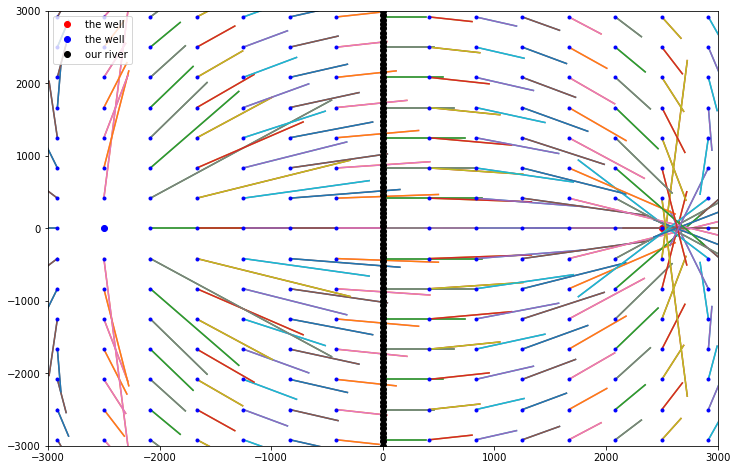

In [26]:
# Combine the three wells into one big well
Q  = 3 * 2400
Yriv = np.linspace(-3000, 3000, 100)
Xriv = np.zeros_like(Yriv)
# Here we define two wells
Qw = [Q, -Q]
Xw = [2500, -2500]
Yw = [0, 0]
labels = ['extr well', 'mirror well']
colors = ['red','blue']

# Observation coordinates
X = np.linspace(-5000, 5000, 100)
Y = np.linspace(-5000, 5000, 100)


# Array or points
x = np.linspace(-5000, 5000, 25)
y = np.linspace(-5000, 5000, 25)
X, Y = np.meshgrid(x, y)

qx = 0
qy = 0
for Q, xw, yw in zip(Qw, Xw, Yw):
    r = np.sqrt ((xw-X) **2 +(yw-Y)**2)
    qx += Q /(2*np.pi*r**2)*(xw-X)
    qy += Q /(2*np.pi*r**2)*(yw-Y)
    
# print ('qx=' , qx, ',qy=' , qy)

sc =1000
for  xw, yw, label, color in zip( Xw, Yw, labels, colors):
    plt.plot( xw, yw, 'o' , color=color ,label = 'the well')
    plt.plot([X.ravel(), (X+sc*qx).ravel()], [Y.ravel(), (Y+sc*qy).ravel()])

plt.plot( X, Y, 'b.' )
plt.plot( Xriv, Yriv, 'ok' , label = 'our river')

plt.xlim(-3000, +3000)
plt.ylim(-3000, +3000)
plt.legend(loc = 'upper left')
set_fig_size()


# The inflow from the river (X=0)

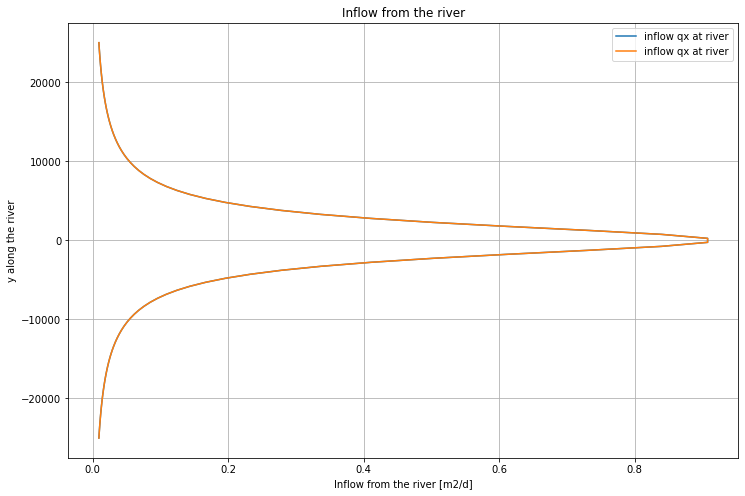

In [20]:
# Combine the three wells into one big well
Q  = 3 * 2400
Yriv = np.linspace(-3000, 3000, 100)
Xriv = np.zeros_like(Yriv)
# Here we define two wells
Qw = [Q, -Q]
Xw = [2500, -2500]
Yw = [0, 0]
labels = ['extr well', 'mirror well']
colors = ['red','blue']

# Observation coordinates
Y = np.linspace(-25000, 25000, 100)
X = np.zeros_like(Y)

qx = 0
qy = 0
for Q, xw, yw in zip(Qw, Xw, Yw):
    r = np.sqrt ((xw-X) **2 +(yw-Y)**2)
    qx += Q /(2*np.pi*r**2)*(xw-X)
    qy += Q /(2*np.pi*r**2)*(yw-Y)
    
# print ('qx=' , qx, ',qy=' , qy)
plt.title("Inflow from the river")
plt.xlabel("Inflow from the river [m2/d]")
plt.ylabel("y along the river")
plt.grid()

for  xw, yw, label, color in zip( Xw, Yw, labels, colors):
    plt.plot(qx, Y, label = 'inflow qx at river')
    

plt.legend(loc = 'upper right')
set_fig_size()

# The inflow from the river (X=0) at different times
Instead of $Q$ we need $Q e^{-u}$ where $u = \frac{r^2 S}{4 KD t}$

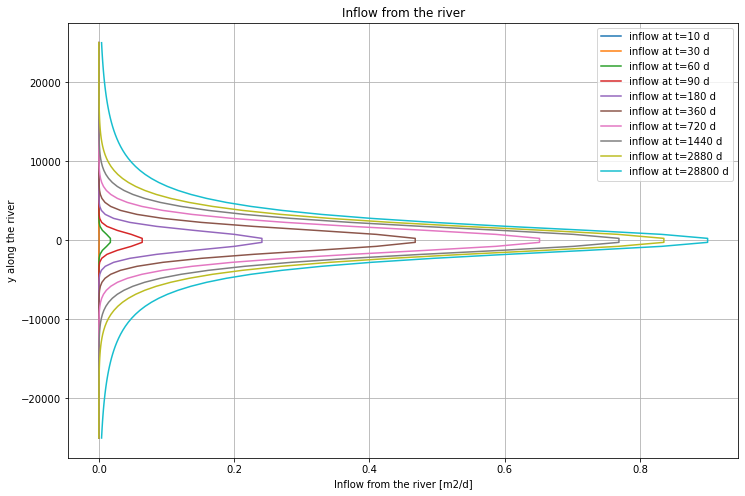

In [27]:
# Combine the three wells into one big well

times = [10,30, 60, 90, 180, 360, 720, 1440, 2880, 28800]

Q  = 3 * 2400
Yriv = np.linspace(-3000, 3000, 100)
Xriv = np.zeros_like(Yriv)
# Here we define two wells
Qw = [Q, -Q]
Xw = [2500, -2500]
Yw = [0, 0]
labels = ['extr well', 'mirror well']
colors = ['red','blue']

# Observation coordinates
Y = np.linspace(-25000, 25000, 100)
X = np.zeros_like(Y)

plt.title("Inflow from the river")
plt.xlabel("Inflow from the river [m2/d]")
plt.ylabel("y along the river")
plt.grid()

for t in times:
    qx = 0
    qy = 0
    for Q, xw, yw in zip(Qw, Xw, Yw):
        r = np.sqrt ((xw-X) **2 +(yw-Y)**2)
        u = r**2 *S / (4*KD*t)
        qx += Q *np.exp(-u)  /(2*np.pi*r**2)*(xw-X)
        qy += Q *np.exp(-u) /(2*np.pi*r**2)*(yw-Y)
    



    plt.plot(qx, Y, label = 'inflow at t={:.0f} d'.format(t))
    

plt.legend(loc = 'upper right')
set_fig_size()

# How much is the total inflow from the river

Qriv(10)= 0 m3/d
Qriv(30)= 1 m3/d
Qriv(60)= 36 m3/d
Qriv(90)= 158 m3/d
Qriv(180)= 758 m3/d
Qriv(360)= 1814 m3/d
Qriv(720)= 3009 m3/d
Qriv(1440)= 4081 m3/d
Qriv(2880)= 4935 m3/d
Qriv(28800)= 6465 m3/d


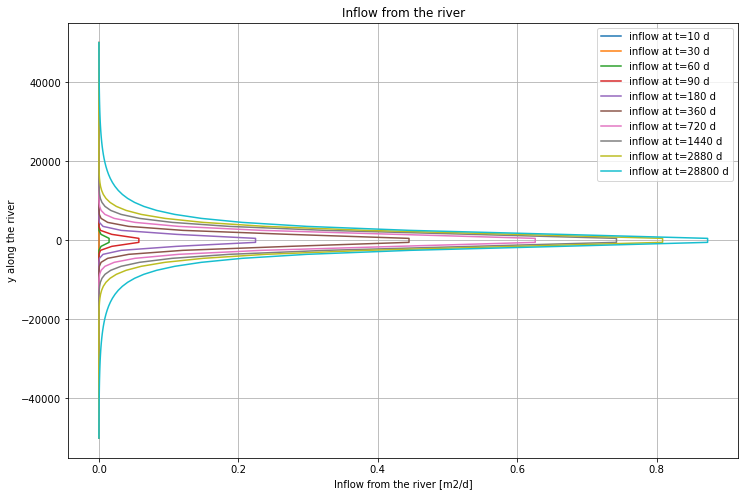

In [28]:
# Combine the three wells into one big well

times = [10,30, 60, 90, 180, 360, 720, 1440, 2880, 28800]

Q  = 3 * 2400
Yriv = np.linspace(-3000, 3000, 100)
Xriv = np.zeros_like(Yriv)
# Here we define two wells
Qw = [Q, -Q]
Xw = [2500, -2500]
Yw = [0, 0]
labels = ['extr well', 'mirror well']
colors = ['red','blue']

# Observation coordinates
Y = np.linspace(-50000, 50000, 100)
X = np.zeros_like(Y)

dY = np.diff(Y)

plt.title("Inflow from the river")
plt.xlabel("Inflow from the river [m2/d]")
plt.ylabel("y along the river")
plt.grid()

for t in times:
    qx = 0
    qy = 0
    for Q, xw, yw in zip(Qw, Xw, Yw):
        r = np.sqrt ((xw-X) **2 +(yw-Y)**2)
        u = r**2 *S / (4*KD*t)
        qx += Q *np.exp(-u)  /(2*np.pi*r**2)*(xw-X)
        #qy += Q *np.exp(-u) /(2*np.pi*r**2)*(yw-Y)
    
    Qriv = np.sum(0.5 * (qx[:-1]+qx[1:]) * dY)
    print("Qriv({:.0f})= {:.0f} m3/d".format(t, Qriv))


    plt.plot(qx, Y, label = 'inflow at t={:.0f} d'.format(t))
    

plt.legend(loc = 'upper right')
set_fig_size()